# Topic words

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./STM/result/topics_beta.csv',)
df = df.drop(['Unnamed: 0'], axis = 1)
last = int(df['topic'].max())

In [3]:
for i in range(1,last+1):
    globals()['df{}'.format(i)] = df[df['topic']== i]
    globals()['df{}'.format(i)].columns = [f'{i}',f'topic_{i}',f'beta{i}']
    globals()['df{}'.format(i)] = globals()['df{}'.format(i)].drop([f'{i}'], axis = 1)
    globals()['df{}'.format(i)] = globals()['df{}'.format(i)].sort_values(by=[f'beta{i}'] ,ascending=False)
    globals()['df{}'.format(i)] = globals()['df{}'.format(i)].reindex()
    globals()['df{}'.format(i)].to_csv(f'./topicwords/topic_{i}_words.csv', index = False)
    globals()['df{}'.format(i)] = globals()['df{}'.format(i)].reset_index(drop=True)

In [4]:
dfall = df1

for i in range(2,last+1):
    dfall = dfall.join(globals()['df{}'.format(i)], how='right')

dfall.to_csv(f'./topicwords/ALLs.csv', index = False)

df200 = dfall.iloc[:200]
df200.to_csv(f'./topicwords/200s.csv', index = False)

for i in range(1,last+1):
    df200 = df200.drop([f'beta{i}'],axis = 1)
    
#df200.to_csv(f'./topicwords/200s_no_beta.csv', index = False)

In [5]:
dffrex = pd.read_csv('./STM/result/topics_frex(0.5).csv',)
dffrex = dffrex.drop(['Unnamed: 0'], axis = 1)
for i in range(last+1):
    x = format(i, '02')
    dffrex  = dffrex.rename(columns={f'V{i}':f'Topic {x}_frex(0.5)'})
    
        
dfprob = pd.read_csv('./STM/result/topics_prob.csv',)
dfprob = dfprob.drop(['Unnamed: 0'], axis = 1)
for i in range(last+1):
    x = format(i, '02')
    dfprob  = dfprob.rename(columns={f'V{i}':f'Topic {x} prob'})

In [6]:
dfFP = pd.concat([dffrex,dfprob],axis=1)

In [7]:
dffrex1 = pd.read_csv('./STM/result/topics_frex(0.1).csv',)
dffrex1 = dffrex1.drop(['Unnamed: 0'], axis = 1)
for i in range(last+1):
    x = format(i, '02')
    dffrex1  = dffrex1.rename(columns={f'V{i}':f'Topic {x}_frex(0.1)'})

In [8]:
dfFP = pd.concat([dfFP,dffrex1],axis=1)
dfFP = dfFP.sort_index(axis=1)
#dfFP.to_csv(f'./topicwords/20s_prob & frex.csv', index = False)

# Prob words

In [9]:
topicnames =['Server queue',
             'Freemium',
             'Purchase Errors',
             'Developer Issues',
             'Quest',
             'Comparison with mobile',
             'Cutscene',
             'MMORPG',
             'Microtransaction',
             'Class',
             'Game Quality',
             'RMT',
             'Player Experience',
             'RNG Upgrade System',
             'Game Contents',
             'Collectibles & Adventure']
            


In [10]:

dfprob = pd.read_csv('./STM/result/topics_prob.csv',)

Vs =[]
for i in range(1,last+1):
    Vs.append(f'V{i}')

topicwordss = []
for i in Vs:
    topicwordss.append(dfprob[i].tolist())

topicwordsss = []

for i in topicwordss:
    line = ''
    for j in i:
        line += j
        line += ', '
    topicwordsss.append(line[:-2])



# SIG

In [11]:
txt = open('./STM/result/predict_topic.txt', 'r')

In [12]:
predict1 = txt.readlines()

In [13]:
txt = predict1[0]
topics = []

colors =[]
estimates = []

intercept = '(Intercept)'
recommend = 'RecommendRecommend'
day = 'Day'
hyphen = '---'

for i in range(last):
    idx = f'Topic {i+1}:  Coefficients'
    x = txt.split(idx)
    
    
    if not i == 0:    
        topics.append(x[0][:x[0].find(intercept)])
        topics.append(x[0][x[0].find(intercept):x[0].find(recommend)])
        topics.append(x[0][x[0].find(recommend)+9:x[0].find(day)])
        estimates.append(float(x[0][x[0].find(recommend)+9:x[0].find(day)].split()[1]))
        if x[0][x[0].find(recommend)+9:x[0].find(day)][10] == '-':
            colors.append('-')
        else:
            colors.append('+')
        topics.append(x[0][x[0].find(day):x[0].find(hyphen)])
        topics.append(x[0][x[0].find(hyphen):])
        topics.append('')
    else:
        topics.append(x[0])
        topics.append('')
        
    
    txt = x[1] 

        
    topics.append(idx)
    
    
    
topics.append(txt[:txt.find(intercept)])
topics.append(txt[txt.find(intercept):txt.find(recommend)])
topics.append(txt[txt.find(recommend)+9:txt.find(day)])
estimates.append(float(txt[txt.find(recommend)+9:txt.find(day)].split()[1]))
if txt[txt.find(recommend)+9:txt.find(day)][10] == '-':
    colors.append('-')
else:
    colors.append('+')
topics.append(txt[txt.find(day):txt.find(hyphen)])
topics.append(txt[txt.find(hyphen):])

In [14]:
txt2 = open('./STM/result/sig.txt','w')

for i in topics:
    txt2.write(str(i).strip())
    txt2.write('\n')
    
txt2.close()


In [15]:
Estimate = []
StdError=[]
tvalue= []
Pr=[]
sig = []

print('topicnames Estimate StdError tvalue Pr sig')
for i in range(len(topics)):
    if i%7 == 5:
        s = topics[i].split()
        
        print(topicnames[int(i/7)],s[1:])

        if s[4] == '<':
            Estimate.append(s[1])
            StdError.append(s[2])   
            tvalue.append(s[3])   
            Pr.append(s[4]+s[5])
            sig.append(s[6])
        elif len(s) == 6:
            Estimate.append(s[1])
            StdError.append(s[2])   
            tvalue.append(s[3])   
            Pr.append(s[4])
            sig.append(s[5])
        else:
            Estimate.append(s[1])
            StdError.append(s[2])   
            tvalue.append(s[3])   
            Pr.append(s[4])
            sig.append(" ")

topicnames Estimate StdError tvalue Pr sig
Server queue ['-8.599e-02', '2.236e-03', '-38.46', '<2e-16', '***']
Freemium ['8.989e-02', '1.071e-03', '83.90', '<', '2e-16', '***']
Purchase Errors ['-3.158e-02', '1.087e-03', '-29.06', '<2e-16', '***']
Developer Issues ['-0.0098737', '0.0010322', '-9.566', '<2e-16', '***']
Quest ['1.723e-02', '1.082e-03', '15.930', '<', '2e-16', '***']
Comparison with mobile ['-1.450e-02', '1.165e-03', '-12.45', '<2e-16', '***']
Cutscene ['-2.429e-02', '1.287e-03', '-18.87', '<2e-16', '***']
MMORPG ['3.611e-02', '1.084e-03', '33.30', '<2e-16', '***']
Microtransaction ['-2.388e-02', '1.181e-03', '-20.22', '<2e-16', '***']
Class ['-4.617e-03', '1.478e-03', '-3.125', '0.00178', '**']
Game Quality ['8.456e-02', '1.211e-03', '69.845', '<2e-16', '***']
RMT ['-4.357e-02', '1.132e-03', '-38.50', '<2e-16', '***']
Player Experience ['1.073e-02', '7.922e-04', '13.55', '<2e-16', '***']
RNG Upgrade System ['-0.0310381', '0.0009732', '-31.89', '<2e-16', '***']
Game Conte

In [16]:
sigcsv = pd.DataFrame(zip(topicnames,Estimate,StdError,tvalue,Pr,sig),columns=['topicnames','Estimate','StdError','tvalue','Pr','sig'])
#sigcsv.to_csv('./STM/result/sig.csv',index = False)

# SNA

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import math


import matplotlib.font_manager as fm 
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



df = pd.read_csv('./STM/result/topics_corr.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [19]:
topicnames_Enter =['Server\nqueue',
             'Freemium',
             'Purchase\nErrors',
             'Developer\nIssues',
             'Quest',
             'Comparison\nwith mobile',
             'Cutscene',
             'MMORPG',
             'Microtransaction',
             'Class',
             'Game\nQuality',
             'RMT',
             'Player\nExperience',
             'RNG\nUpgrade System',
             'Game\nContents',
             'Collectibles\n& Adventure']

for i in range(len(topicnames_Enter)):
    x = format(i, '02')    
    df  = df.rename(columns={f'V{i+1}':topicnames_Enter[i]}) 

df.index = topicnames_Enter


In [20]:
df['Microtransaction'].sort_values(ascending = False)

Microtransaction             1.000000
RNG\nUpgrade System          0.322817
Game\nContents               0.217707
RMT                          0.112205
Collectibles\n& Adventure    0.064840
Developer\nIssues            0.057588
Purchase\nErrors            -0.026629
Freemium                    -0.085130
Comparison\nwith mobile     -0.105757
Quest                       -0.127414
Cutscene                    -0.139536
Class                       -0.160818
MMORPG                      -0.162416
Player\nExperience          -0.190093
Server\nqueue               -0.190687
Game\nQuality               -0.265238
Name: Microtransaction, dtype: float64

In [21]:
dt = pd.read_csv('./STM/result/topic_proportion(no_beta).csv')
dt = dt.drop(['Unnamed: 0'], axis = 1)
dt = dt.drop(['docnum'], axis = 1)
nodesizes = dt.sum().to_list()

In [22]:
sums = 0
proportions = []
for i in nodesizes:
    sums += i
for i in nodesizes:
    proportions.append(i*100/sums)
dfproportions = pd.DataFrame(zip(proportions,topicwordsss),index = topicnames_Enter, columns = ['proportions','topicwords'])
dfproportions.to_csv('./STM/result/result(%).csv')


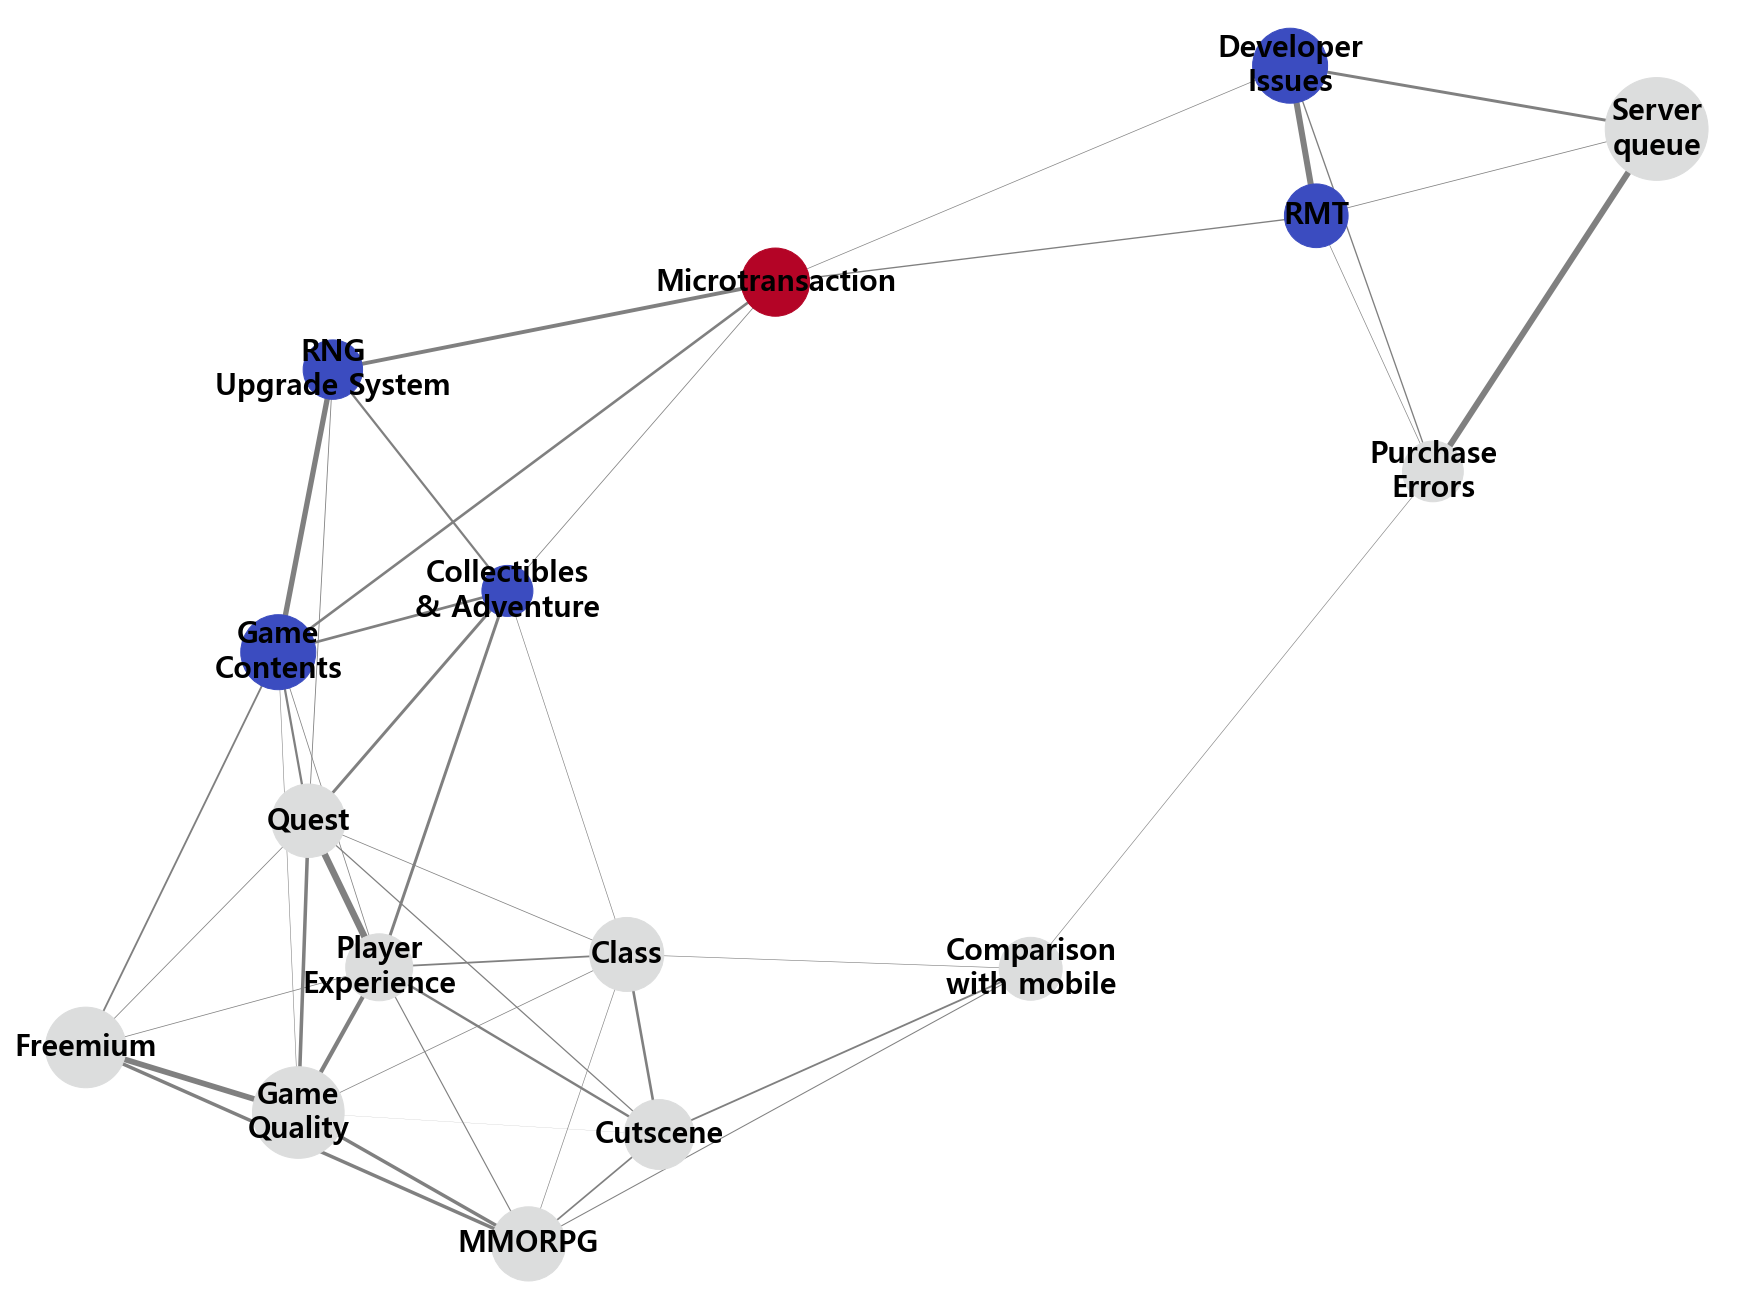

In [27]:
size = 1300

minn = min(nodesizes)

for i in range(len(nodesizes)):
    x = nodesizes[i]
    nodesizes[i] = x*size/minn

links = df.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
links_filtered=links.loc[ (links['value'] > 0.01) & (links['var1'] != links['var2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2',edge_attr='value')

widths = [i['value'] for i in dict(G.edges).values()]
for i in range(len(widths)):
    x = widths[i]
    widths[i] = x*12

sort = list(G.nodes())

sort_colors = []
sort_nodesizes = []
sort_estimates = []

for i in sort:
    for j in range(len(topicnames_Enter)):
        if i == topicnames_Enter[j]:
            sort_colors.append(colors[j])
            #sort_estimates.append(math.log(abs(estimates[j])))
            sort_estimates.append(abs(estimates[j]))
            sort_nodesizes.append(nodesizes[j]*2)

sort_colors_estimates = [0.5,0.5,1,1,0.5,   
                         0.5,0.5,0.5,0.5,1,               
                         0.5,0, #(micro)
                         0.5,0.5,1,1]
#sort_colors_estimates = []




def split_estimates(i):
    if i>0.08:
        return 4
    if i>0.02:
        return 3
    if i>0.0042:
        return 2
    else:
        return 1
    

#for i in range(len(sort_colors)):
#    sort_colors_estimates.append(float((str(sort_colors[i]) + str(split_estimates(sort_estimates[i])))))
    

plt.figure(figsize=(24,18)) 
#plt.figure(figsize=(10,10)) 




nx.draw(G, with_labels=True, node_size=sort_nodesizes, edge_color='gray', linewidths=1, font_family=font_name, font_weight = 'bold', font_size=30, width =  widths, node_color=sort_colors_estimates, cmap=plt.cm.coolwarm_r )
#plt.savefig("./STM/result/topics_corr.png", format="PNG")
#plt.savefig("./STM/result/topics_corr(ENG).png", format="PNG")

# SIG2

In [29]:
txt3 = open('./STM/result/sig_interaction.txt','w')


for i in topics:
    txt3.write(str(i).strip())
    txt3.write('\n')
    
txt3.close()


In [30]:
txt2 = open('./STM/result/predict_topic_interaction.txt', 'r')

In [31]:
predict2 = txt2.readlines()

In [32]:
txt2 = predict2[0][120:]
topics2 = []

intercept = '(Intercept)'
recommend = 'RecommendRecommend'
day = 'Day'
hyphen = '---'

RD = 'Recommend:Day'

for i in range(last):
    idx = f'Topic {i+1}:  Coefficients'
    x = txt2.split(idx)
    topics2.append(idx)
    topics2.append(x[-1][:x[-1].find(intercept)])
    topics2.append(x[-1][x[-1].find(intercept):x[-1].find(recommend)])
    topics2.append(x[-1][x[-1].find(recommend)+9:x[-1].find(day)])
    topics2.append(x[-1][x[-1].find(day):x[-1].find(RD)-9])
    topics2.append(x[-1][x[-1].find(RD):x[-1].find(hyphen)])
    #topics2.append(x[-1][x[-1].find(hyphen):])
    topics2.append('')

In [33]:
txt3 = open('./STM/result/sig_interaction.txt','w')

for i in topics2:
    txt3.write(str(i).strip())
    txt3.write('\n')
    
txt3.close()


In [34]:
col = ['Estimate', 'Std. Error' ,'t value' ,' Pr(>|t|)' , 'stars']

In [36]:
txt4 = open('./STM/result/sig_interaction.txt', 'r')

predict3 = txt4.readlines()
txt4.close()

txt4lines = []

topicnames =['Server queue',
             'Free-to-play',
             'Purchase Error',
             'Complain about Developer',
             'Quest',
             'Comparison with mobile',
             'Cutscene',
             'MMORPG',
             'Microtransaction',
             'Class',
             'Quality',
             'RMT',
             'User Experience',
             'RNG',
             'Game Content',
             'Collectibles & Adventure']

for i in range(len(predict3)):
    if predict3[i][0:13] == 'Recommend:Day':
        line = predict3[i]
        line = line[line.find(RD)+14:]
        line = line.split()
        if len(line) == 4:
            line.append('')
            txt4lines.append(line)
        elif len(line) == 6:
            line[3] = line[3]+line[4]
            line.remove(line[4])
            txt4lines.append(line)
        else:
            txt4lines.append(line)
            
#for i in range(len(txt4lines)):
    #x = proportions[i]
    #y = txt4lines[i]
    #y.append(x)
    
txt4df = pd.DataFrame(txt4lines, index = topicnames, columns = col)


txt4df.to_csv('./STM/result/sig_interaction.csv')
txt4.close()

In [37]:

txt5 = open('./STM/result/sig_interaction.txt', 'r')
RDlines = txt5.readlines()
txt5.close()

print('TopicName\tEstimate\tStd. Error\tt value\tPr(>|t|)\ttopicname ')

for i in range(len(RDlines)):
    if i % 7  == 5:
        print(topicnames[int(i/7)] + '\t'+ RDlines[i][13:-1])

TopicName	Estimate	Std. Error	t value	Pr(>|t|)	topicname 
Server queue	  3.609e-04  5.867e-05   6.151 7.78e-10 ***
Free-to-play	 -4.975e-05  3.279e-05  -1.517   0.1292
Purchase Error	  2.648e-04  2.898e-05   9.137   <2e-16 ***
Complain about Developer	 -4.508e-04  3.593e-05 -12.548   <2e-16 ***
Quest	  1.002e-04  2.923e-05   3.430 0.000605 ***
Comparison with mobile	  9.497e-05  2.821e-05   3.367 0.000761 ***
Cutscene	  0.0002572  0.0000351   7.329 2.38e-13 ***
MMORPG	 -1.692e-04  3.166e-05  -5.342 9.23e-08 ***
Microtransaction	 -2.114e-05  3.547e-05  -0.596    0.551
Class	  1.986e-04  4.300e-05   4.619 3.87e-06 ***
Quality	 -1.322e-04  3.265e-05  -4.050 5.14e-05 ***
RMT	 -9.616e-04  4.129e-05  -23.29   <2e-16 ***
User Experience	  6.982e-05  2.171e-05   3.216   0.0013 **
RNG	 -4.993e-05  2.833e-05  -1.763    0.078 .
Game Content	 3.690e-04  3.474e-05   10.62   <2e-16 ***
Collectibles & Adventure	 1.181e-04  2.157e-05   5.476 4.38e-08 ***


# 그림합성

In [1]:
from PIL import Image

* topics_day

* interaction

In [6]:
filenames = []

for i in range(1, last+1):
    filenames.append(f'interaction_topic{i}.png')


In [7]:
image1 = Image.open(f'./STM/result/interaction/{filenames[0]}')
image1_size = image1.size

new_image = Image.new('RGB',(4*image1_size[0],4*image1_size[1]), (250,250,250))

for i in range(last):
    image = Image.open(f'./STM/result/interaction/{filenames[i]}')
    new_image.paste(image,(int(i%4)*image1_size[0],int(i/4)*image1_size[0]))
    
#new_image.save("./STM/result/interaction/interaction_topic_merge.png","png")
new_image.save("./STM/result/interaction/interaction_topic_merge(ENG).png","png")

In [8]:
image1 = Image.open(f'./STM/result/interaction/{filenames[8]}')
image1_size = image1.size

new_image = Image.new('RGB',(3*image1_size[0], 2*image1_size[1]), (250,250,250))

new_image.paste(image1.resize((image1_size[0], image1_size[0])),(0,0))

corrlist = [8, 3, 13, 11, 14, 15]

for i in range(len(corrlist)):
    j = corrlist[i]
    image = Image.open(f'./STM/result/interaction/{filenames[j]}')
    new_image.paste(image,(int(i%3)*image1_size[0],(int(i/3))*image1_size[0]))

    
    
#new_image.save("./STM/result/interaction/interaction_topic_merge.png","png")
new_image.save("./STM/result/interaction/interaction_topic_mergeENG.png","png")

## Prob/Frex

In [2]:
prob = pd.read_csv('./STM/result/topics_prob.csv',)
frex = pd.read_csv('./STM/result/topics_frex(0.5).csv',)
prob = prob.drop(['Unnamed: 0'], axis = 1)
frex = frex.drop(['Unnamed: 0'], axis = 1)
topicnames =['Server Queue',
             'Free-to-play',
             'Errors',
             'Developer Issue',
             'Quest',
             'Comparison with mobile',
             'Cutscene',
             'MMORPG',
             'Microtransaction',
             'Class',
             'Graphic',
             'RMT',
             'User Experience',
             'RNG',
             'Motivation',
             'Collectible & Travel']
순서 = [1,11,2,15,4,8,10,5,7,9,13,12,6,3,14,16]
for i in range(len(topicnames)):
    x = format(i, '02')    
    #prob  = prob.rename(columns={f'V{i+1}':topicnames[i]}) 
    
for i in range(len(topicnames)):
    x = format(i, '02')    
    #frex  = frex.rename(columns={f'V{i+1}':topicnames[i]}) 
    

In [3]:
prob[f'V1'][:7].to_list()

['server', 'queue', 'wait', 'time', 'launch', 'europe', 'amazon']

In [4]:
l = []


for i in 순서:
    i = i-1
    l2 = {}
    x = format(i, '02')   
    l2['topicname'] = topicnames[i]
    l3 = []
    for j in prob[f'V{i+1}'][:7].to_list():
        l3.append(j)
    l2['prob'] = l3
    l3 = []
    for j in frex[f'V{i+1}'][:7].to_list():
        l3.append(j)
    l2['frex'] = l3
    
    l.append(l2)
    
    

In [5]:
for i in l:
    print(i['topicname'])

Server Queue
Graphic
Free-to-play
Motivation
Developer Issue
MMORPG
Class
Quest
Cutscene
Microtransaction
User Experience
RMT
Comparison with mobile
Errors
RNG
Collectible & Travel


In [6]:
for i in l:
    print(i['prob'], i['frex'])

['server', 'queue', 'wait', 'time', 'launch', 'europe', 'amazon'] ['capacity', 'europe', 'queue', 'unplayable', 'server', 'central', 'maintenance']
['fun', 'fight', 'story', 'pretty', 'graphic', 'easy', 'amaze'] ['satisfy', 'beautiful', 'fluid', 'fun', 'solid', 'addict', 'fight']
['free', 'enjoy', 'pvp', 'love', 'mmorpg', 'recommend', 'ptw'] ['bark', 'pve', 'pvp', 'league', 'addictive', 'rank', 'equalize']
['content', 'grind', 'gear', 'raid', 'dungeon', 'end', 'progression'] ['horizontal', 'ilvl', 'raid', 'tier', 'guardian', 'chaos', 'dailie']
['player', 'time', 'issue', 'release', 'developer', 'recommend', 'update'] ['developer', 'community', 'state', 'feedback', 'current', 'player', 'future']
['mmo', 'diablo', 'rpg', 'korea', 'style', 'poe', 'action'] ['dawn', 'poe', 'grim', 'itch', 'diablo', 'rpg', 'tera']
['class', 'character', 'skill', 'use', 'ability', 'lock', 'move'] ['mage', 'gender', 'male', 'female', 'movement', 'mouse', 'wasd']
['level', 'quest', 'bore', 'end', 'main', 'way'

### 토픽 겹치는 리뷰 보기

In [1]:
import pandas as pd

In [2]:
from tqdm import tqdm

x = []

df= pd.read_csv('토픽-리뷰합성.csv')
for i in tqdm(df.index):
    y = []
    for j in range(len(df.iloc[i])):
        if j-2 >= 1:
            y.append((j-2,df.iloc[i][j]))
        else:
            y.append(df.iloc[i][j])
    x.append(y)

100%|███████████████████████████████████████████████████████████████████████████| 33468/33468 [01:05<00:00, 509.61it/s]


In [22]:
l4 = []
l12 = []
l14 = []
l15 = []
l16 = []


for i in tqdm(x):
    line = i[3:]
    maxtopicn = 0
    max2topicn = 0
    maxtopicv = 0
    max2topicv = 0

    for j in range(len(line)):
        if line[j][1] > maxtopicv:
            maxtopicn = line[j][0]
            maxtopicv = line[j][1]
        
        elif line[j][1] > max2topicv:
            max2topicv = line[j][0]
            max2topicn = line[j][1]
            

    if maxtopicn == 9:
        if max2topicn == 4:
            l4.append(i)
        if max2topicn == 12:
            l12.append(i)
        if max2topicn == 14:
            l14.append(i)
        if max2topicn == 15:
            l15.append(i)
        if max2topicn == 16:
            l16.append(i)
            
    if maxtopicn == 9:            
        if i[6][1] > 0.1:
            l4.append(i)
        if i[14][1] > 0.1:
            l12.append(i)
        if i[16][1] > 0.1:
            l14.append(i)
        if i[17][1] > 0.1:
            l15.append(i)
        if i[18][1] > 0.1:
            l16.append(i)
            
    if maxtopicn == 4:
        if max2topicn == 9:
            l4.append(i)
        elif i[11][1] > 0.1:
            l4.append(i)
            
    if maxtopicn == 12:
        if max2topicn == 9:
            l12.append(i)
        elif i[11][1] > 0.1:
            l12.append(i)
            
    if maxtopicn == 14:
        if max2topicn == 9:
            l14.append(i)
        elif i[11][1] > 0.1:
            l14.append(i)
            
    if maxtopicn == 15:
        if max2topicn == 9:
            l15.append(i)
        elif i[11][1] > 0.1:
            l15.append(i)
            
    if maxtopicn == 16:
        if max2topicn == 9:
            l16.append(i)
        elif i[11][1] > 0.1:
            l16.append(i)

    
        

100%|████████████████████████████████████████████████████████████████████████| 33468/33468 [00:00<00:00, 148069.08it/s]


In [23]:
le = []
raw = []
positive = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []
topic8 = []
topic9 = []
topic10 = []
topic11 = []
topic12 = []
topic13 = []
topic14 = []
topic15 = []
topic16 = []

for line in l4:
    le.append(line[0])
    raw.append(line[1])
    positive.append(line[2])
    topic1.append(line[3][1])
    topic2.append(line[4][1])
    topic3.append(line[5][1])
    topic4.append(line[6][1])
    topic5.append(line[7][1])
    topic6.append(line[8][1])
    topic7.append(line[9][1])
    topic8.append(line[10][1])
    topic9.append(line[11][1])
    topic10.append(line[12][1])
    topic11.append(line[13][1])
    topic12.append(line[14][1])
    topic13.append(line[15][1])
    topic14.append(line[16][1])
    topic15.append(line[17][1])
    topic16.append(line[18][1])
    
df4 = pd.DataFrame(zip(le,raw,positive,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16),
                    columns = ['le','raw','positive','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16'])


po = 0
ne = 0
for i in positive:
    if i == 1:
        po += 1
    else:
        ne += 1
print(po)
print(ne)

df4.to_csv(f'9-4(1={po}, 0={ne}).csv', index =False)

124
340


In [24]:
le = []
raw = []
positive = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []
topic8 = []
topic9 = []
topic10 = []
topic11 = []
topic12 = []
topic13 = []
topic14 = []
topic15 = []
topic16 = []

for line in l12:
    le.append(line[0])
    raw.append(line[1])
    positive.append(line[2])
    topic1.append(line[3][1])
    topic2.append(line[4][1])
    topic3.append(line[5][1])
    topic4.append(line[6][1])
    topic5.append(line[7][1])
    topic6.append(line[8][1])
    topic7.append(line[9][1])
    topic8.append(line[10][1])
    topic9.append(line[11][1])
    topic10.append(line[12][1])
    topic11.append(line[13][1])
    topic12.append(line[14][1])
    topic13.append(line[15][1])
    topic14.append(line[16][1])
    topic15.append(line[17][1])
    topic16.append(line[18][1])
    
df12 = pd.DataFrame(zip(le,raw,positive,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16),
                    columns = ['le','raw','positive','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16'])


po = 0
ne = 0
for i in positive:
    if i == 1:
        po += 1
    else:
        ne += 1
print(po)
print(ne)

df12.to_csv(f'9-12(1={po}, 0={ne}).csv', index =False)

49
608


In [25]:
le = []
raw = []
positive = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []
topic8 = []
topic9 = []
topic10 = []
topic11 = []
topic12 = []
topic13 = []
topic14 = []
topic15 = []
topic16 = []

for line in l14:
    le.append(line[0])
    raw.append(line[1])
    positive.append(line[2])
    topic1.append(line[3][1])
    topic2.append(line[4][1])
    topic3.append(line[5][1])
    topic4.append(line[6][1])
    topic5.append(line[7][1])
    topic6.append(line[8][1])
    topic7.append(line[9][1])
    topic8.append(line[10][1])
    topic9.append(line[11][1])
    topic10.append(line[12][1])
    topic11.append(line[13][1])
    topic12.append(line[14][1])
    topic13.append(line[15][1])
    topic14.append(line[16][1])
    topic15.append(line[17][1])
    topic16.append(line[18][1])
    
df14 = pd.DataFrame(zip(le,raw,positive,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16),
                    columns = ['le','raw','positive','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16'])


po = 0
ne = 0
for i in positive:
    if i == 1:
        po += 1
    else:
        ne += 1
print(po)
print(ne)

df14.to_csv(f'9-14(1={po}, 0={ne}).csv', index =False)

51
794


In [26]:
le = []
raw = []
positive = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []
topic8 = []
topic9 = []
topic10 = []
topic11 = []
topic12 = []
topic13 = []
topic14 = []
topic15 = []
topic16 = []

for line in l15:
    le.append(line[0])
    raw.append(line[1])
    positive.append(line[2])
    topic1.append(line[3][1])
    topic2.append(line[4][1])
    topic3.append(line[5][1])
    topic4.append(line[6][1])
    topic5.append(line[7][1])
    topic6.append(line[8][1])
    topic7.append(line[9][1])
    topic8.append(line[10][1])
    topic9.append(line[11][1])
    topic10.append(line[12][1])
    topic11.append(line[13][1])
    topic12.append(line[14][1])
    topic13.append(line[15][1])
    topic14.append(line[16][1])
    topic15.append(line[17][1])
    topic16.append(line[18][1])
    
df15 = pd.DataFrame(zip(le,raw,positive,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16),
                    columns = ['le','raw','positive','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16'])


po = 0
ne = 0
for i in positive:
    if i == 1:
        po += 1
    else:
        ne += 1
print(po)
print(ne)

df15.to_csv(f'9-15(1={po}, 0={ne}).csv', index =False)

504
655


In [27]:
le = []
raw = []
positive = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []
topic8 = []
topic9 = []
topic10 = []
topic11 = []
topic12 = []
topic13 = []
topic14 = []
topic15 = []
topic16 = []

for line in l16:
    le.append(line[0])
    raw.append(line[1])
    positive.append(line[2])
    topic1.append(line[3][1])
    topic2.append(line[4][1])
    topic3.append(line[5][1])
    topic4.append(line[6][1])
    topic5.append(line[7][1])
    topic6.append(line[8][1])
    topic7.append(line[9][1])
    topic8.append(line[10][1])
    topic9.append(line[11][1])
    topic10.append(line[12][1])
    topic11.append(line[13][1])
    topic12.append(line[14][1])
    topic13.append(line[15][1])
    topic14.append(line[16][1])
    topic15.append(line[17][1])
    topic16.append(line[18][1])
    
df16 = pd.DataFrame(zip(le,raw,positive,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16),
                    columns = ['le','raw','positive','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16'])

po = 0
ne = 0
for i in positive:
    if i == 1:
        po += 1
    else:
        ne += 1
print(po)
print(ne)

df16.to_csv(f'9-16(1={po}, 0={ne}).csv', index =False)

63
86


In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('토픽-리뷰합성.csv')

In [4]:
max1 = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']].idxmax(axis=1).to_list()
df['max'] = max1


In [5]:
cnt = 0
for i in range(1, 17):
    dfmicro = df[df['max']==str(i)]
    num1 = dfmicro['Positive=1'].to_list().count(1)
    num0 = dfmicro['Positive=1'].to_list().count(0)
    print(i, num1, num0)
    cnt += num1
    cnt += num0
print(cnt)

1 2508 4431
2 2647 90
3 209 392
4 505 612
5 979 679
6 496 644
7 674 1551
8 1469 521
9 600 1180
10 1187 1338
11 4200 218
12 188 1529
13 325 393
14 123 965
15 1464 857
16 289 205
33468


1180

In [47]:
df

,Review,Raw,Positive=1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,max
0,as of writing ilvl scrapper with too m...,As of writing 1442.5 iLvl Scrapper with too ma...,0,0.010,0.007,0.008,0.079,0.014,0.005,0.015,0.033,0.057,0.095,0.009,0.085,0.030,0.036,0.204,0.314,16
1,if you love your time eaten away and wasted b...,If you love your time eaten away and wasted by...,0,0.020,0.024,0.012,0.053,0.021,0.180,0.025,0.021,0.170,0.019,0.032,0.053,0.019,0.273,0.054,0.022,14
2,the games ok tho there r better mmos and rou...,"the games ok tho, there r better mmos and roug...",0,0.036,0.028,0.028,0.062,0.039,0.041,0.087,0.139,0.052,0.036,0.095,0.122,0.044,0.116,0.057,0.017,8
3,huge absolutely massive time sink with littl...,"Huge, absolutely massive time sink with little...",0,0.026,0.020,0.008,0.091,0.087,0.020,0.056,0.024,0.042,0.025,0.109,0.125,0.042,0.123,0.174,0.027,15
4,feels a bit empty i love mmos and can often ...,Feels a bit empty. I love MMOS and can often c...,0,0.016,0.041,0.005,0.056,0.063,0.030,0.168,0.049,0.029,0.086,0.149,0.037,0.075,0.103,0.073,0.019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33463,the game itself plays and looks like some ...,The game itself plays and looks like some 2008...,0,0.028,0.054,0.013,0.031,0.093,0.020,0.028,0.101,0.064,0.036,0.060,0.013,0.053,0.105,0.265,0.033,15
33464,this game after the tutorial was as default a...,This game after the tutorial was as default as...,0,0.030,0.013,0.018,0.019,0.027,0.189,0.362,0.048,0.013,0.164,0.036,0.018,0.034,0.012,0.006,0.012,7
33465,genderlock trash bruh wtf is is the pu...,GENDER LOCK TRASH!!!!!!!\nBruh…Wtf is is the p...,0,0.036,0.010,0.018,0.020,0.015,0.221,0.126,0.033,0.029,0.384,0.021,0.032,0.017,0.014,0.008,0.015,10
33466,if you have an iq over play literally any...,"If you have an IQ over 60, play literally anyt...",0,0.021,0.033,0.013,0.020,0.117,0.049,0.101,0.076,0.039,0.111,0.079,0.014,0.154,0.044,0.056,0.073,13
